In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import logging
import missingno as msno
import seaborn as sns
from b_class_data_frame_transform import DataFrameTransform
from b_class_plotter import Plotter

# Load the dataset from the CSV file
df = pd.read_csv('b_df_3_encoded_loan_data.csv')

## **Step 9: `DataFrameTransform` Class for identifying skewed data**

To visualise the transformations and null value distributions effectively, I am designing a `Plotter` class using Plotly for interactive charts. 

The `Plotter` class is designed to handle data visualizations using Plotly, focusing on:

- **Null Distribution:** Visualize missing data before and after handling.
- **Numerical Distributions:** Plot histograms for each numerical column.
- **Categorical Counts:** Display bar charts for unique value counts in each categorical column.

#### **Methods**

1. `plot_null_distribution(self, initial_nulls, final_nulls):` <br>
   Displays the count of null values per column before and after transformations. It also creates a grouped bar chart with Plotly’s `graph_objects` to compare initial and final null counts.
   <br><br>
2. `plot_numerical_distributions(self):`<br>
   Plots histograms for numerical columns to understand data distributions.Iterates over all numerical columns, using px.histogram to display distributions.
   <br><br>
3. `plot_categorical_counts(self):` <br>Show counts of each unique value in categorical columns. For each categorical column, generates a bar chart showing unique value counts using `px.bar`.

In [2]:
# Instantiate the updated class and apply transformations to identify skewed columns
transformer = DataFrameTransform(df)

# Identify skewed columns
skewed_columns = transformer.identify_skewed_columns(threshold=0.50)
print("Skewed Columns Identified:\n")
for column in skewed_columns:
    print(f"- {column}")

Skewed Columns Identified:

- collection_recovery_fee
- collections_12_mths_ex_med
- recoveries
- total_rec_late_fee
- annual_inc
- delinq_2yrs
- inq_last_6mths
- mths_since_last_record
- mths_since_last_major_derog
- last_payment_amount
- id
- out_prncp_inv
- out_prncp
- member_id
- total_rec_int
- purpose
- mths_since_last_delinq
- total_payment
- total_rec_prncp
- total_payment_inv
- open_accounts
- term
- instalment
- funded_amount
- funded_amount_inv
- loan_amount
- total_accounts
- sub_grade
- grade


## **Step 10: `Plotter` Class for QQ Plots and histogram KDE**

To visualise the transformations and null value distributions effectively, I am designing a `Plotter` class using Plotly for interactive charts. 

The `Plotter` class is designed to handle data visualizations using Plotly, focusing on:

- **Null Distribution:** Visualize missing data before and after handling.
- **Numerical Distributions:** Plot histograms for each numerical column.
- **Categorical Counts:** Display bar charts for unique value counts in each categorical column.

Q-Q Plots prior to Transformation:


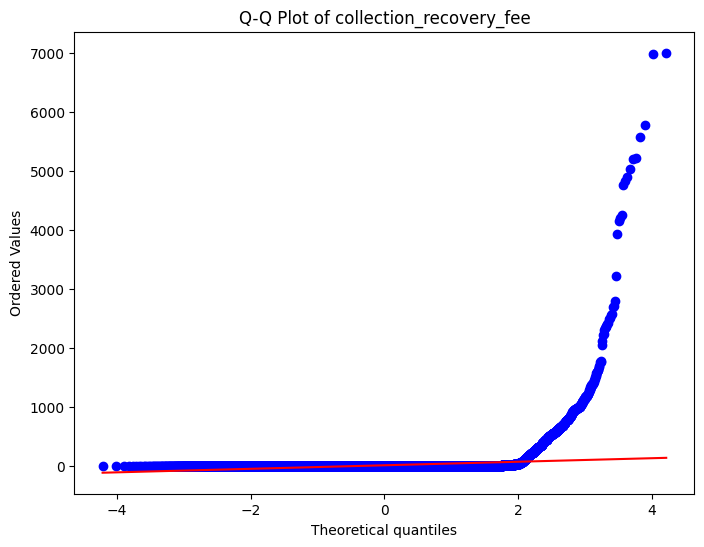

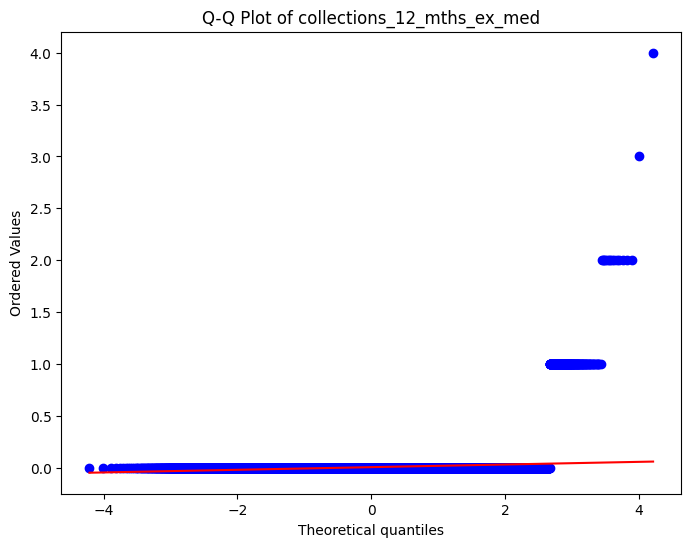

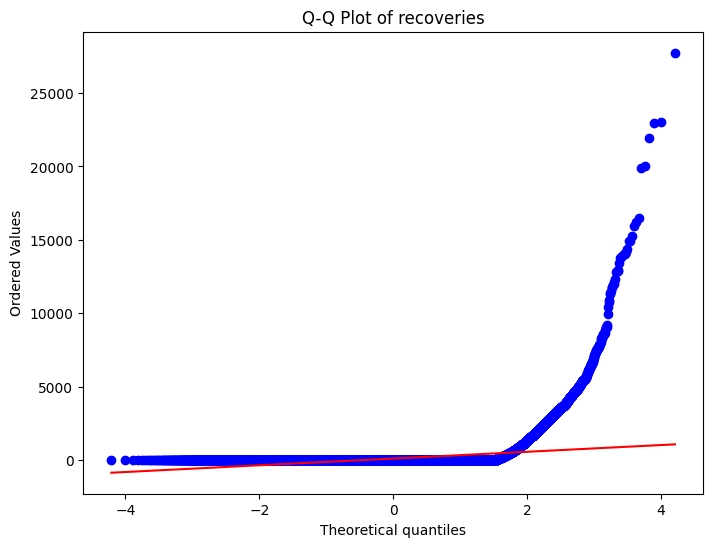

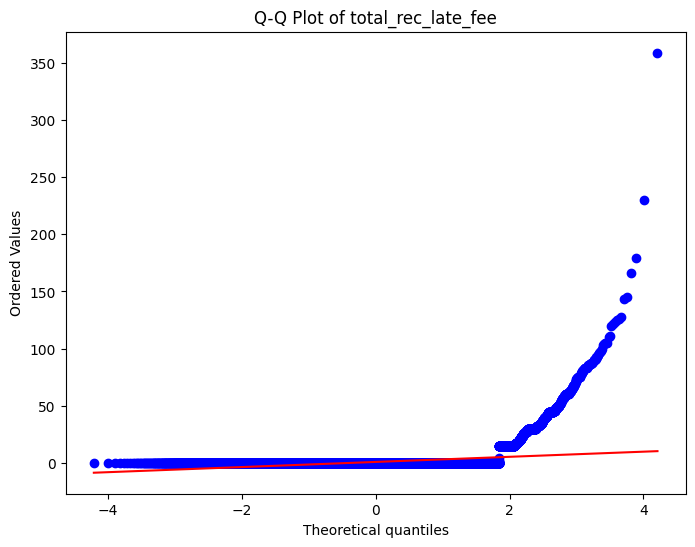

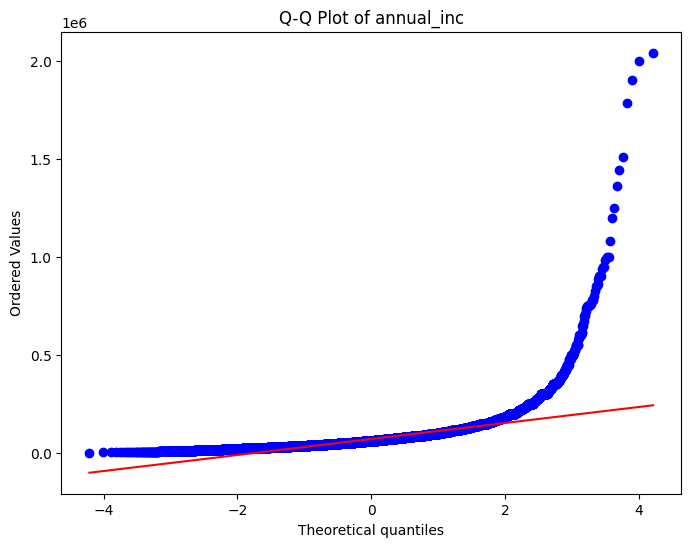

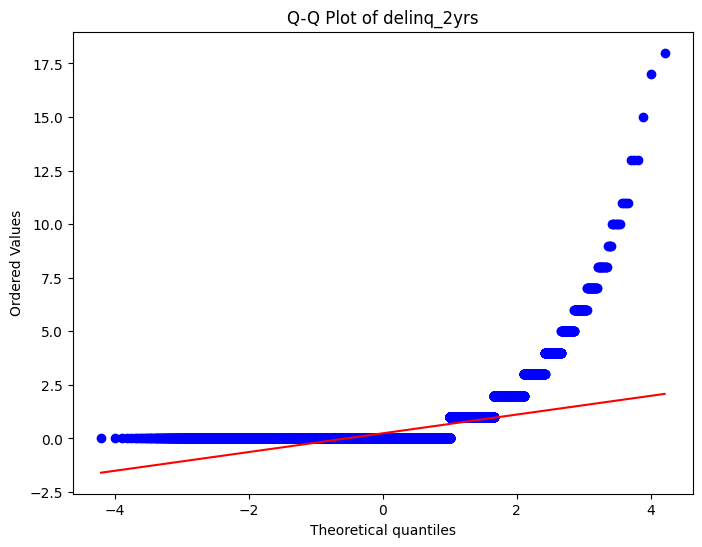

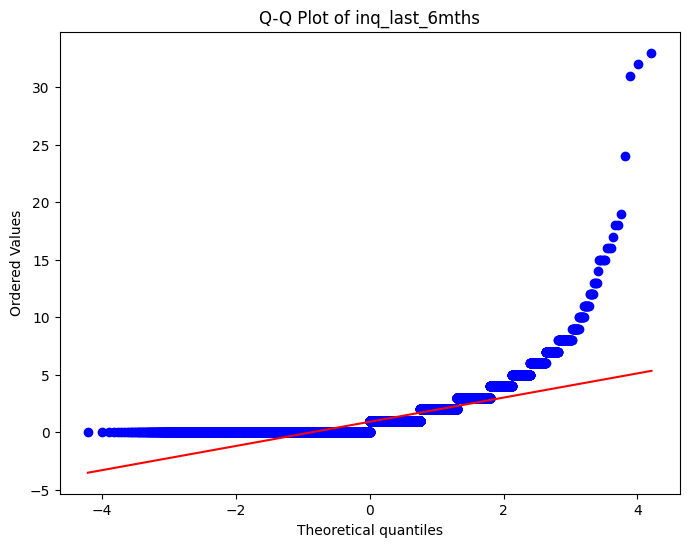

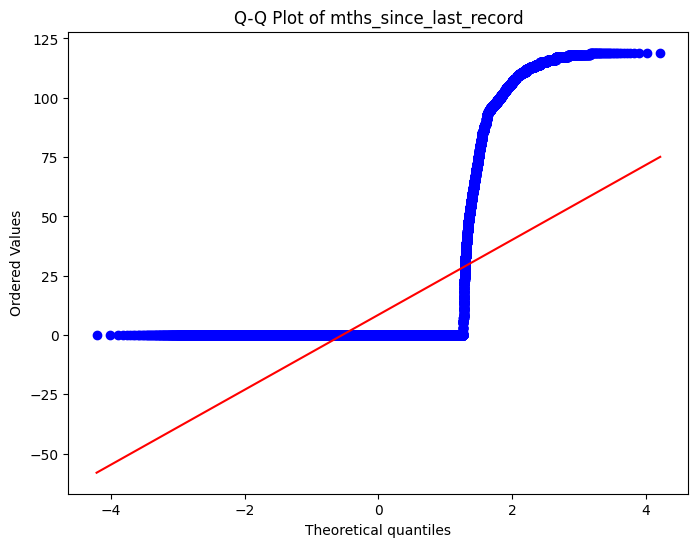

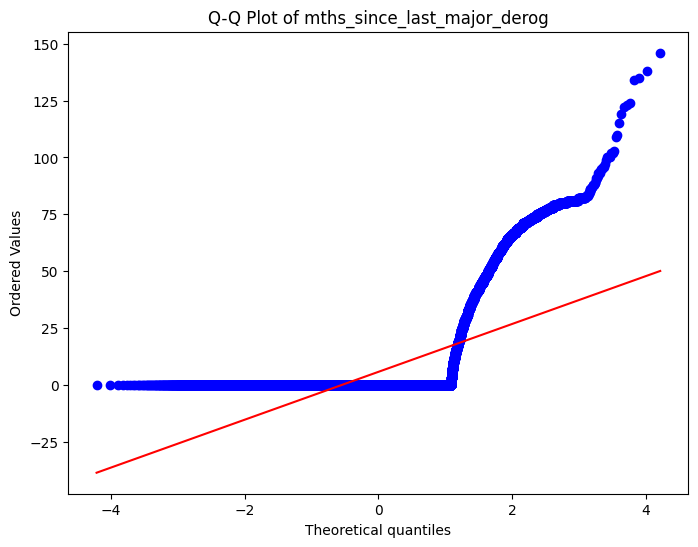

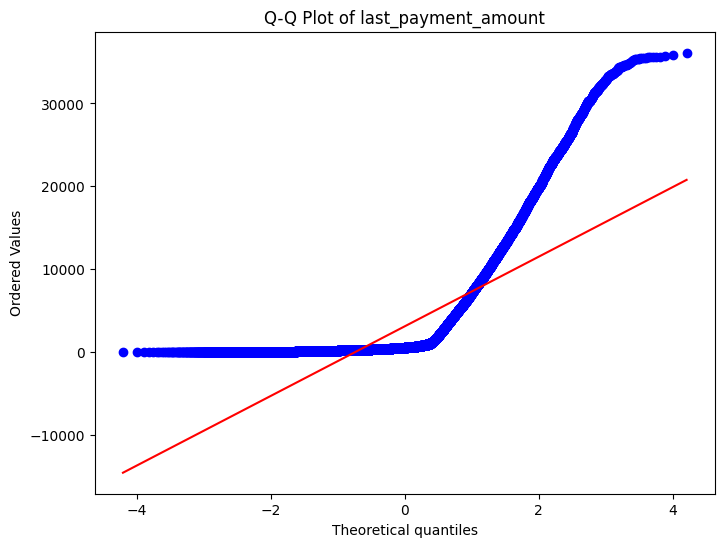

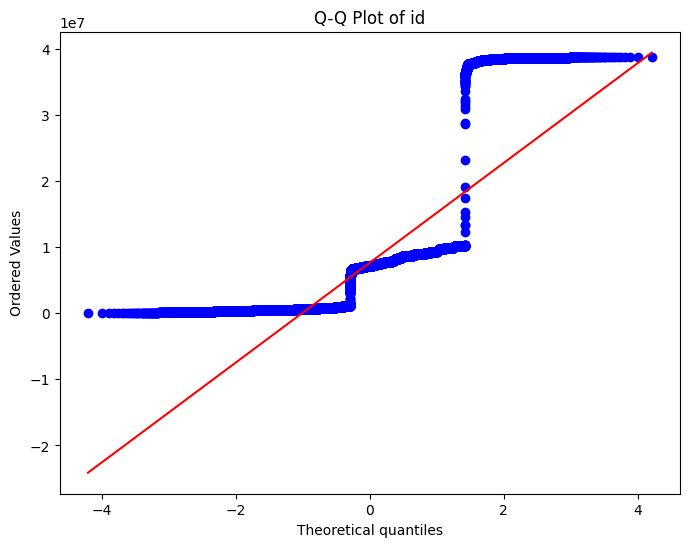

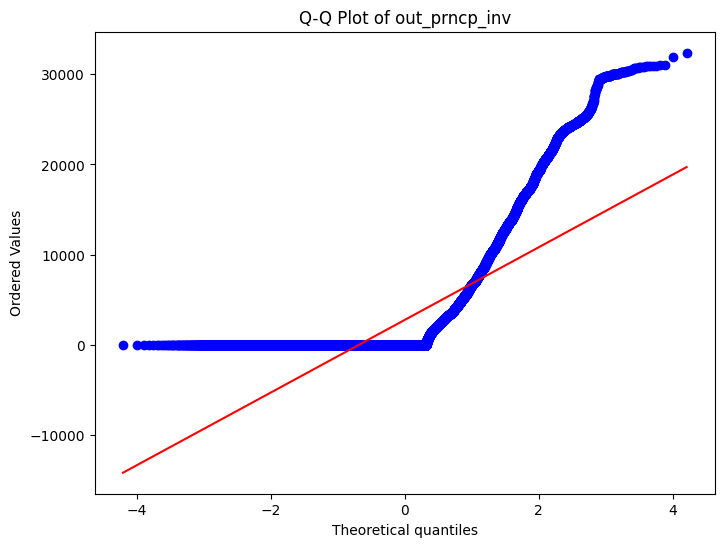

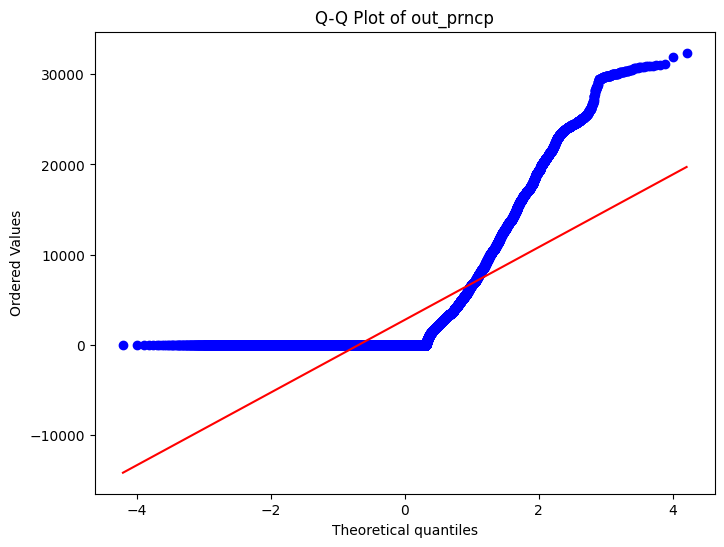

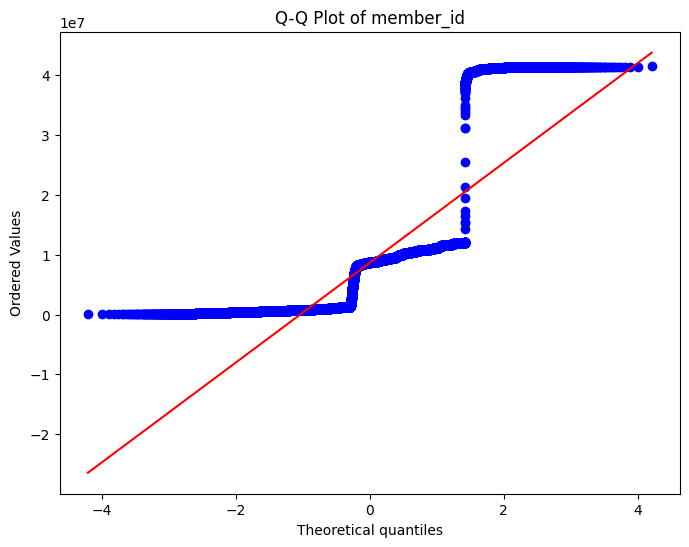

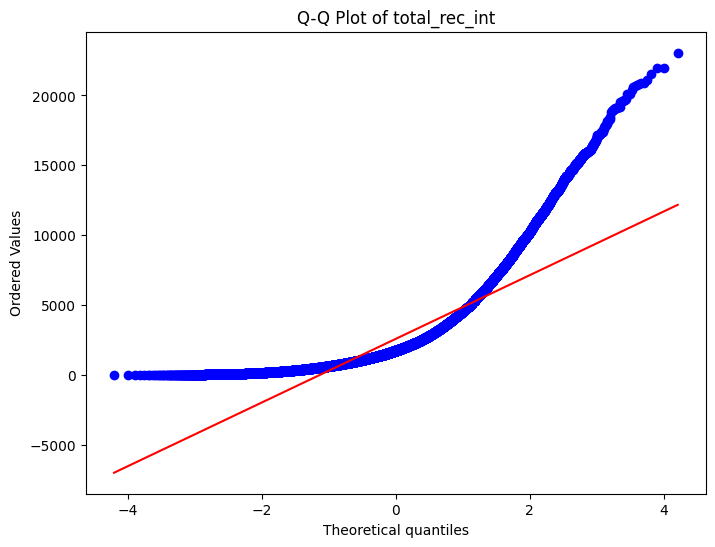

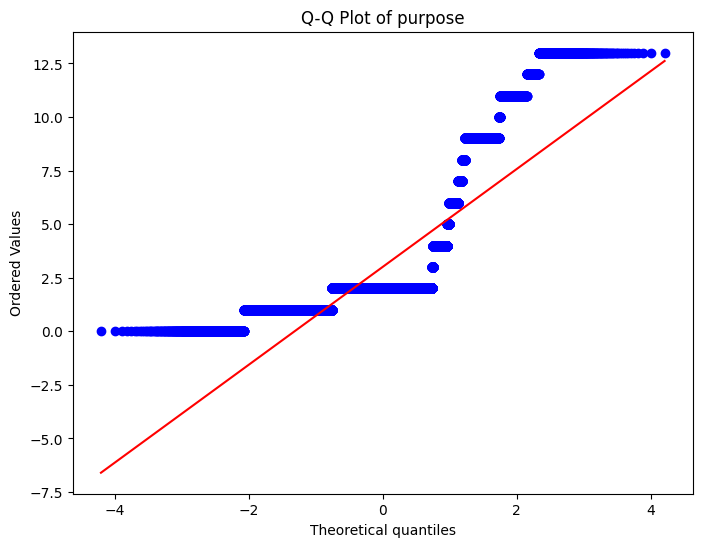

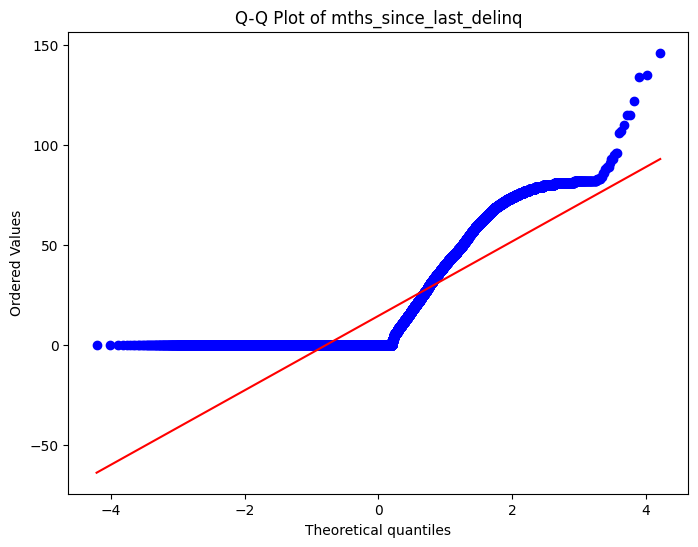

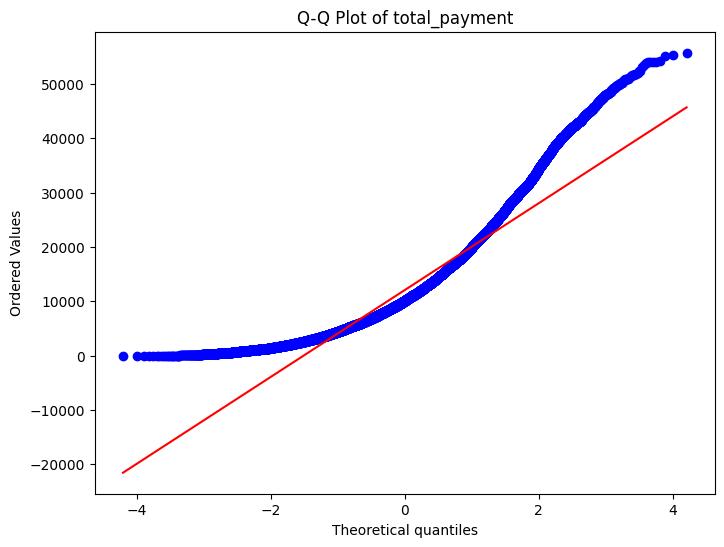

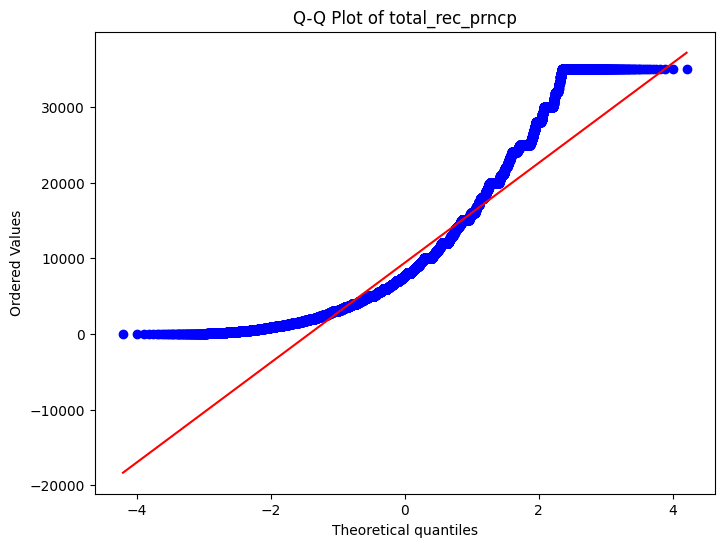

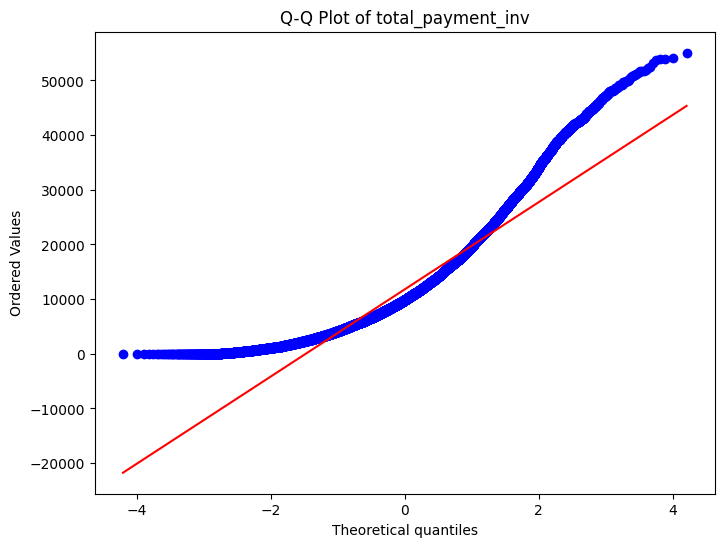

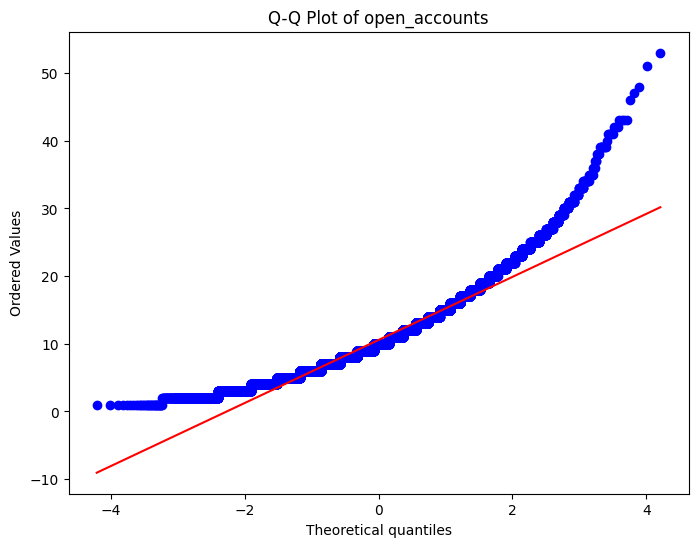

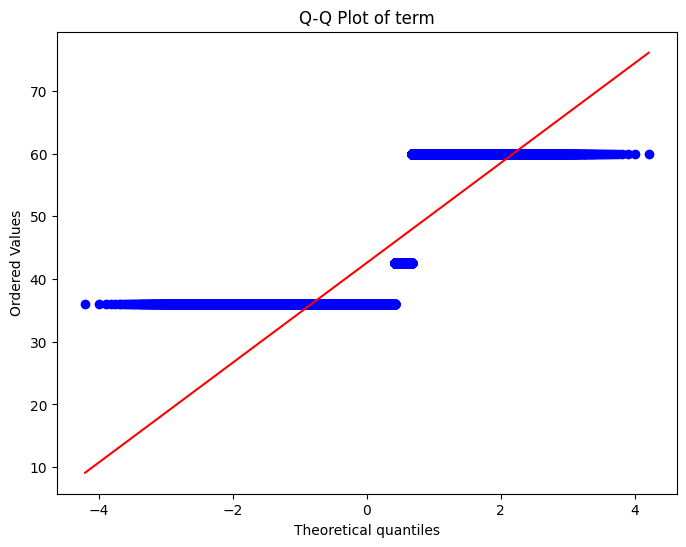

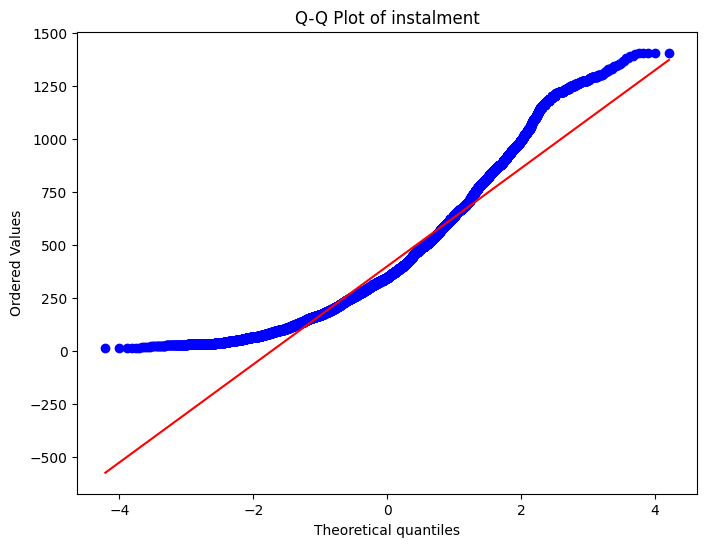

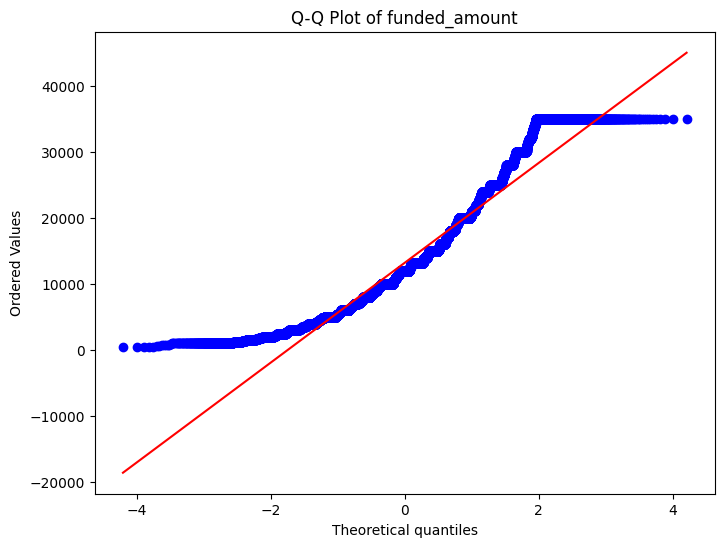

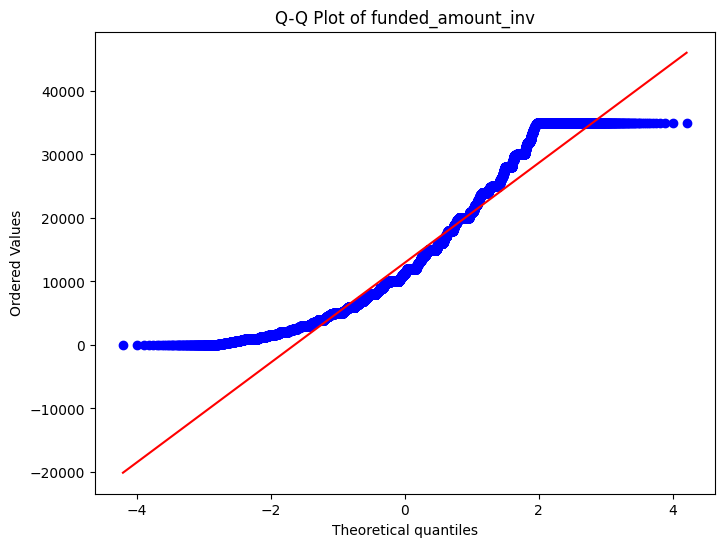

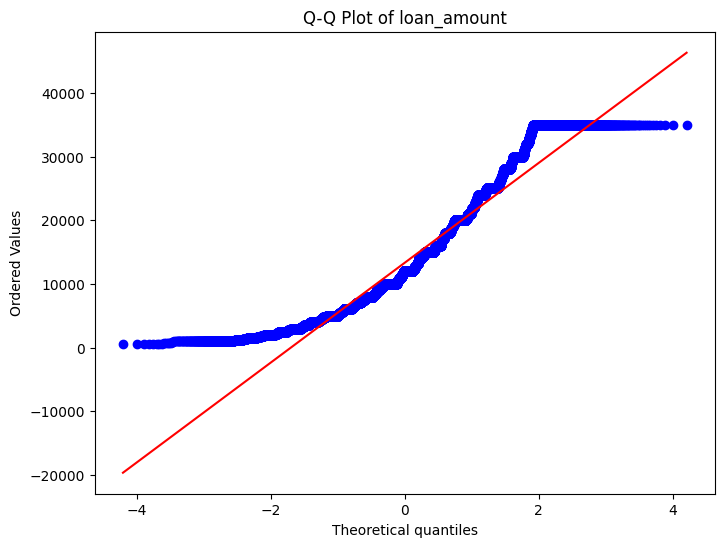

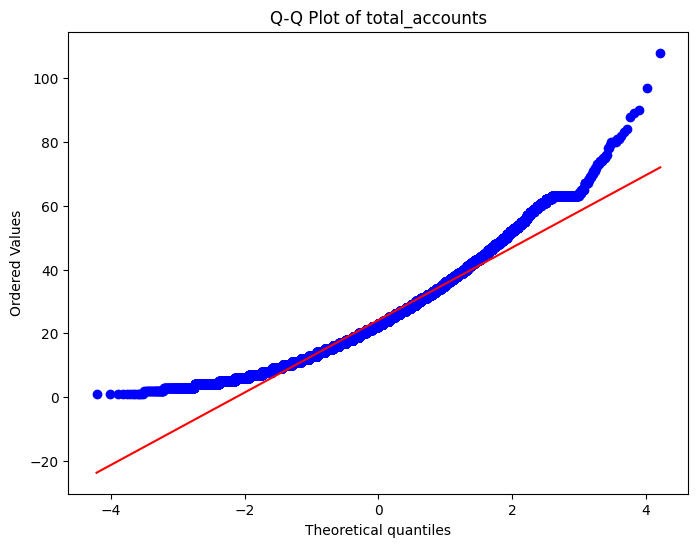

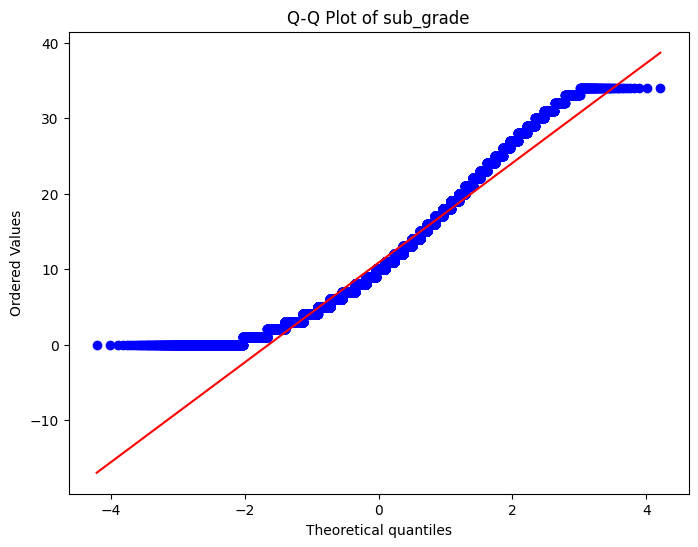

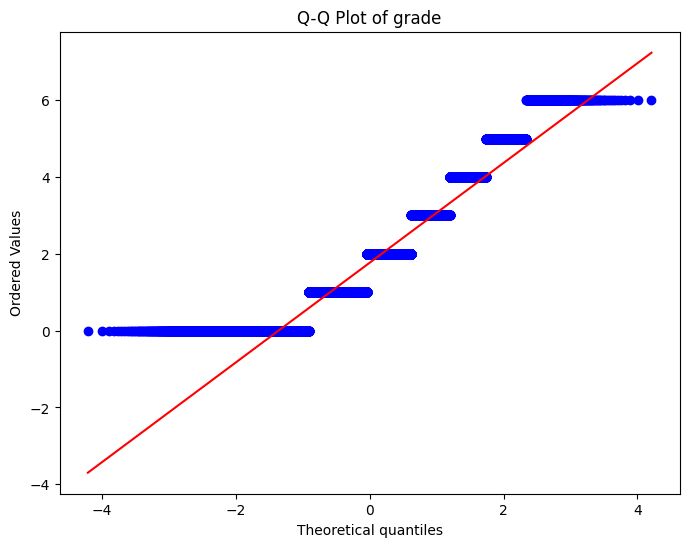

Histograms with KDE prior to Transformation:


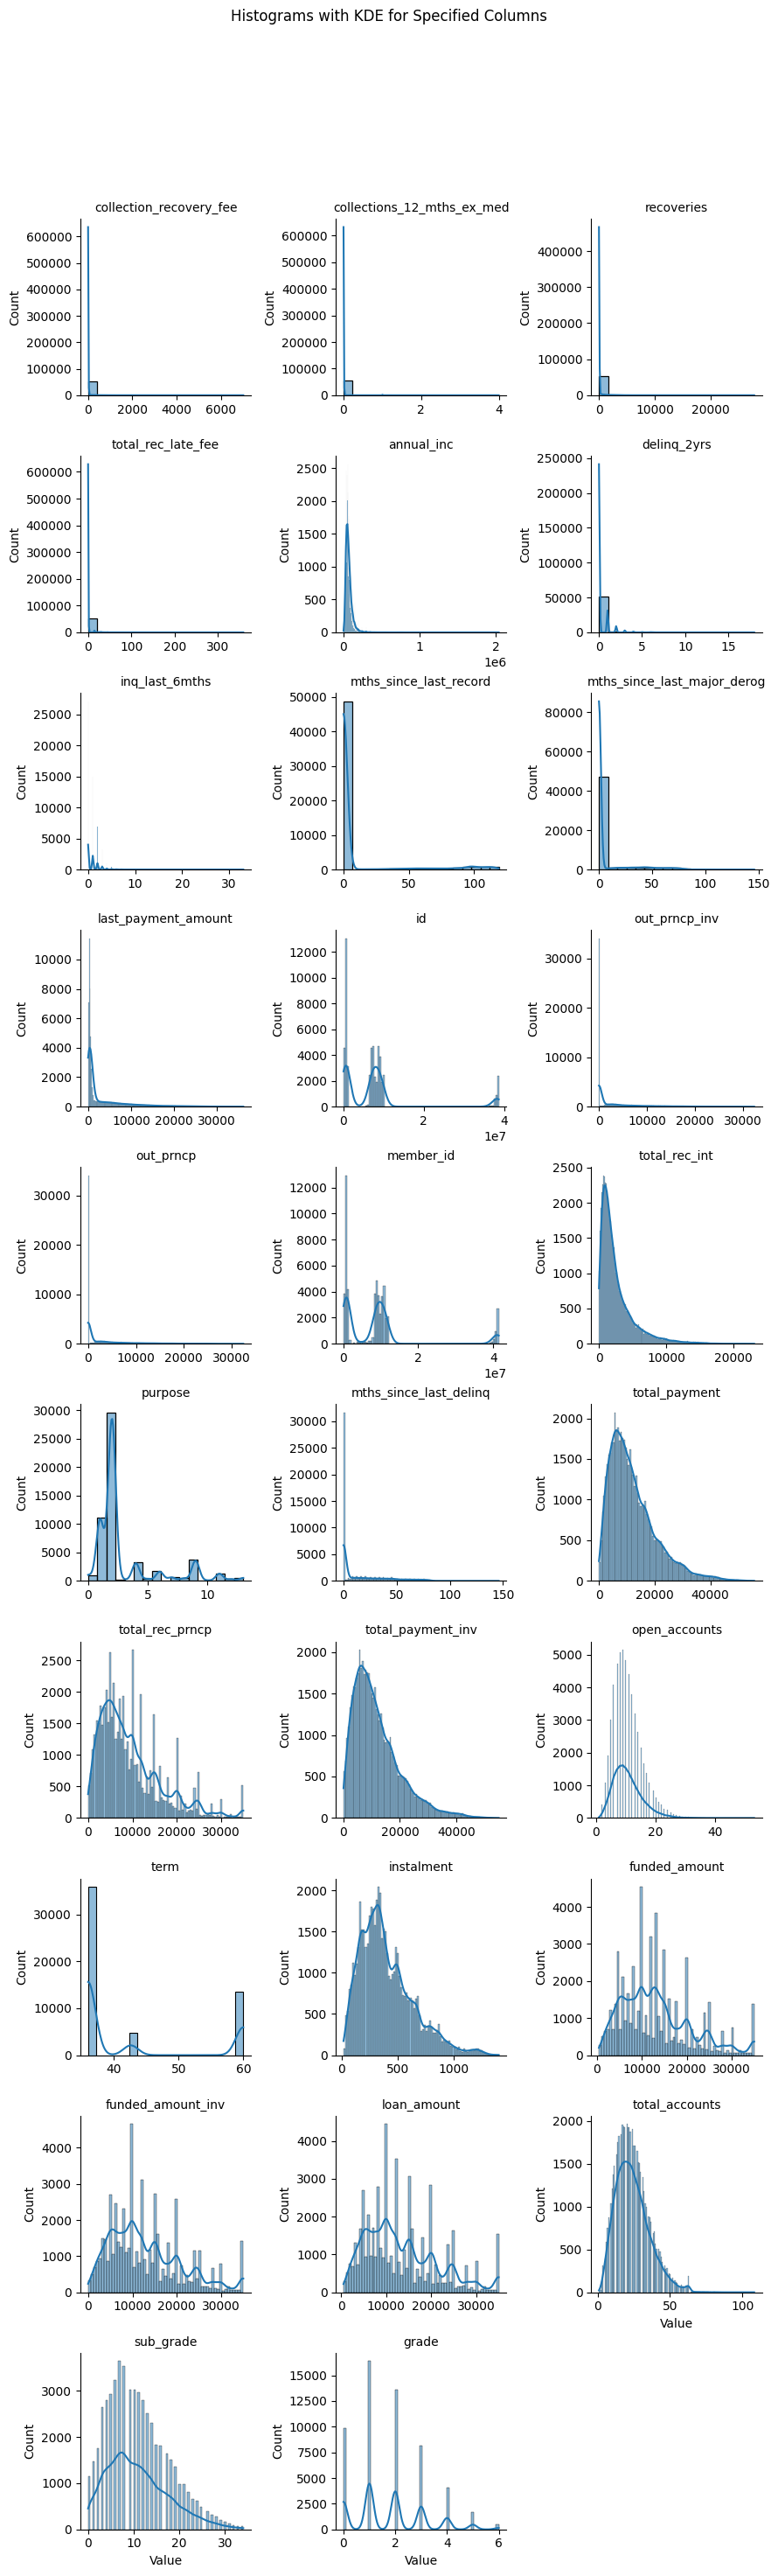

In [3]:
# Step 2: Visualize Q-Q Plots and Histograms Before Transformation
# Instantiate Plotter with the original DataFrame
plotter = Plotter(df)

# Q-Q Plots prior to Transformation
print("Q-Q Plots prior to Transformation:")
for col in skewed_columns:
    plotter.qq_plot(col)

# Histograms with KDE prior to Transformation using FacetGrid
print("Histograms with KDE prior to Transformation:")
plotter.plot_histograms_with_kde(skewed_columns)

### Print Skewness

In [4]:
print("\nSkewness Prior to Transformation (for all numeric columns):\n")
for col in skewed_columns:
    skewness_value = df[col].skew()
    print(f"{col}: {skewness_value:.4f}")


Skewness Prior to Transformation (for all numeric columns):

collection_recovery_fee: 27.6368
collections_12_mths_ex_med: 20.2624
recoveries: 14.5898
total_rec_late_fee: 13.1843
annual_inc: 8.7118
delinq_2yrs: 5.3700
inq_last_6mths: 3.2489
mths_since_last_record: 3.0254
mths_since_last_major_derog: 2.9561
last_payment_amount: 2.4994
id: 2.3703
out_prncp_inv: 2.3568
out_prncp: 2.3564
member_id: 2.2054
total_rec_int: 2.2043
purpose: 1.9010
mths_since_last_delinq: 1.4203
total_payment: 1.2679
total_rec_prncp: 1.2610
total_payment_inv: 1.2562
open_accounts: 1.0593
term: 1.0538
instalment: 0.9970
funded_amount: 0.8456
funded_amount_inv: 0.8139
loan_amount: 0.8053
total_accounts: 0.7790
sub_grade: 0.7002
grade: 0.6950


## Analysis of Skewness Prior to Transformation

Before applying transformations, an analysis of the skewness values for all numeric columns in the dataset revealed that many columns exhibited high levels of skewness, indicating non-normal distributions. Here are the main observations:

1. **Highly Skewed Columns**:<br> Several columns showed very high skewness values, such as `collection_recovery_fee` (27.6368), `collections_12_mths_ex_med` (20.2623), `recoveries` (14.5898), and `total_rec_late_fee` (6.2771). These high levels of skewness indicate the presence of extreme values or a large number of zeros, which is common in financial datasets where some features may have sparse but significant occurrences. Such skewness can adversely affect the performance of machine learning models, making it difficult for them to generalize well.
<br><br>
2. **Moderately Skewed Columns**:<br> Columns such as `delinq_2yrs` (5.3700), `inq_last_6mths` (3.2489), `last_payment_amount` (1.4370), and `out_prncp_inv` (1.2250) also exhibited moderate skewness. These columns could benefit from transformation to improve the symmetry of their distributions, potentially enhancing the model's ability to learn effectively from the data.
<br><br>
3. **Near-Normal Distributions**:<br> Some columns, such as `annual_inc` (0.1378), `funded_amount` (0.1529), `loan_amount` (0.1649), and `total_payment_inv` (0.2948), had skewness values close to zero. These columns are already approximately normally distributed and do not require significant transformation. However, minor adjustments could still improve their distributions slightly.
<br><br>
4. **Columns Requiring Special Consideration**:<br> Columns like `id` (2.3703), `member_id` (2.2054), and `term` (1.0538) had higher skewness, but their nature as identifiers or categorical-like values means that applying transformations may not always be appropriate. These columns may need to be treated differently, such as being excluded from transformations or encoded in a specific manner.
<br><br>
5. **Overall Observation**:<br> Many of the columns exhibited significant skewness before transformations, particularly features with high occurrences of zero values or a few extreme outliers. Addressing these issues through skewness-reducing transformations is crucial for improving the performance of machine learning models, especially when linear models or algorithms sensitive to non-normality are used.

### **Conclusion**
The analysis of skewness prior to transformation highlights the need for preprocessing steps to make the distributions more symmetric, reducing the impact of extreme outliers and improving model performance. Highly skewed columns, in particular, would benefit from transformations such as log or Box-Cox, while near-normal features could remain largely unchanged. Identifiers and categorical-like features should be carefully handled to avoid unnecessary transformations that could distort their meaning.

## **Step 11: Performing Transformations on skewed columns**



In [5]:
# Instantiate the updated class and apply transformations
transformer = DataFrameTransform(df)

# Continous data in pre-selected columns
columns_to_transform = [
    'loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate',
    'instalment', 'annual_inc', 'dti', 'out_prncp', 'out_prncp_inv',
    'total_payment', 'total_payment_inv', 'total_rec_int', 'total_rec_late_fee', 'last_payment_amount'
]

# Apply transformations to reduce skewness in the specified columns
transformer.transform_skewed_columns(columns_to_transform)

# Display the transformed DataFrame to verify transformations
df[columns_to_transform].head()


Original skewness for 'loan_amount': 0.81
Applied yeojohnson transform on 'loan_amount' (new skewness: -0.04)

Original skewness for 'funded_amount': 0.85
Applied boxcox transform on 'funded_amount' (new skewness: -0.03)

Original skewness for 'funded_amount_inv': 0.81
Box-Cox transformation failed on 'funded_amount_inv': Box-Cox transformation requires all positive values.
Applied sqrt transform on 'funded_amount_inv' (new skewness: 0.07)

Original skewness for 'int_rate': 0.43
Applied boxcox transform on 'int_rate' (new skewness: -0.01)

Original skewness for 'instalment': 1.00
Applied boxcox transform on 'instalment' (new skewness: -0.02)

Original skewness for 'annual_inc': 8.71
Applied boxcox transform on 'annual_inc' (new skewness: -0.01)

Original skewness for 'dti': 0.19
Box-Cox transformation failed on 'dti': Box-Cox transformation requires all positive values.
Applied yeojohnson transform on 'dti' (new skewness: -0.09)

Original skewness for 'out_prncp': 2.36
Box-Cox transfo

,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_int,total_rec_late_fee,last_payment_amount
0,-0.547433,78.512353,89.442719,3.336438,16.248288,7.932932,0.518574,0.000181,0.000181,-1.380185,-1.268649,-1.111782,-0.183125,-0.731479
1,0.183688,95.620568,114.891253,3.162855,19.752465,7.976826,1.074702,0.000110,0.000110,-0.889805,-0.820460,-0.759946,-0.183125,-0.430729
2,0.501527,103.113467,126.491106,3.336438,21.347193,8.179708,0.192800,1000000.000000,1000000.000000,0.737838,0.754301,-0.721123,-0.183125,1.586807
3,0.392431,100.538054,122.474487,5.265357,21.631018,7.884792,2.333964,1000000.000000,1000000.000000,0.653312,0.669648,-0.600162,-0.183125,1.630925
4,0.392431,100.538054,122.474487,2.809890,20.645917,8.518577,-1.773410,0.000097,0.000097,-0.765436,-0.704642,-0.778487,-0.183125,-0.361901


In [6]:
# After transformation, ensure the transformed DataFrame is used in the Plotter
transformed_df = transformer.df

Q-Q Plots after Transformation:


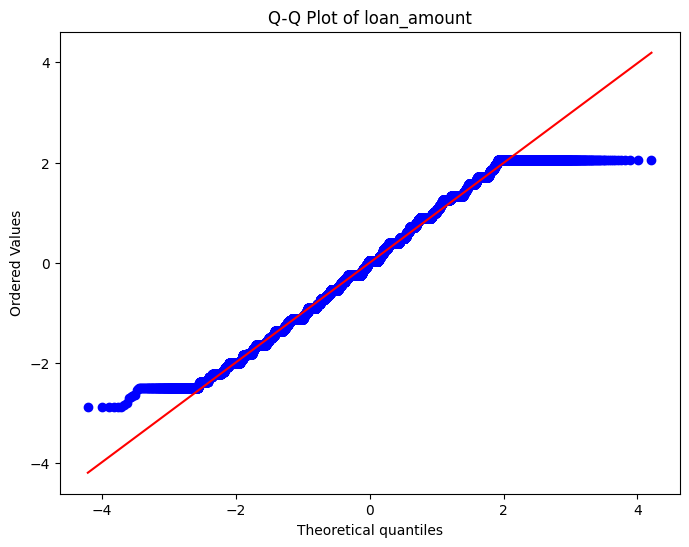

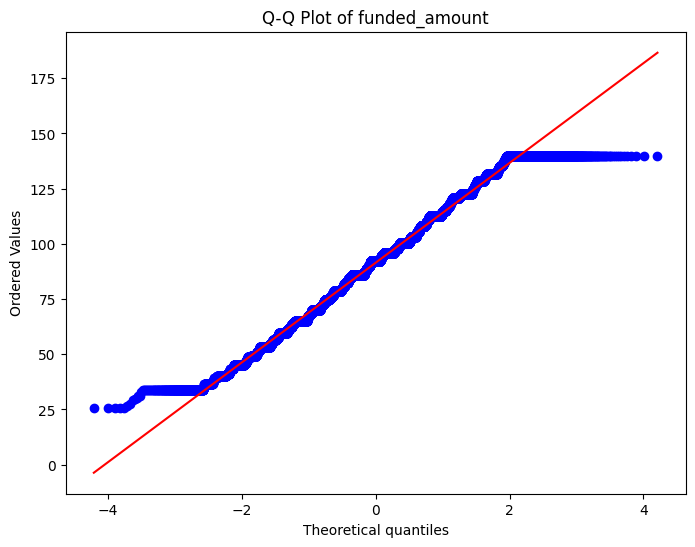

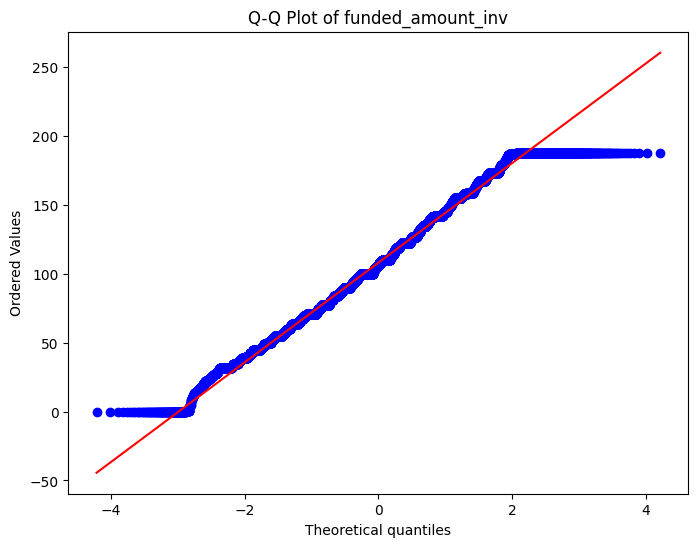

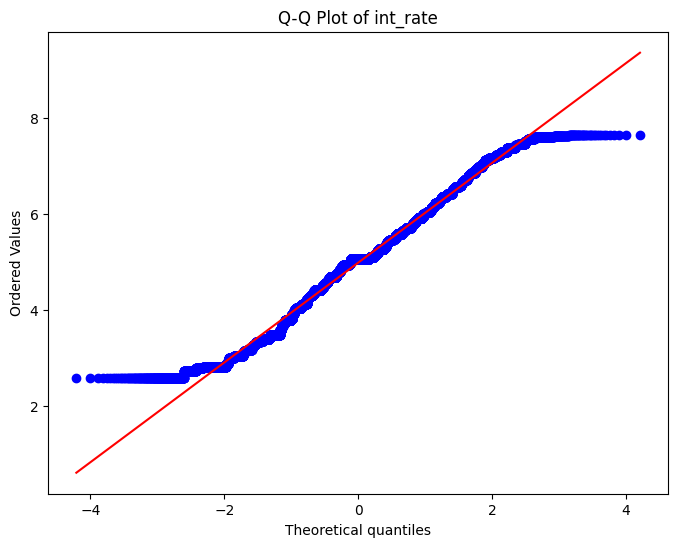

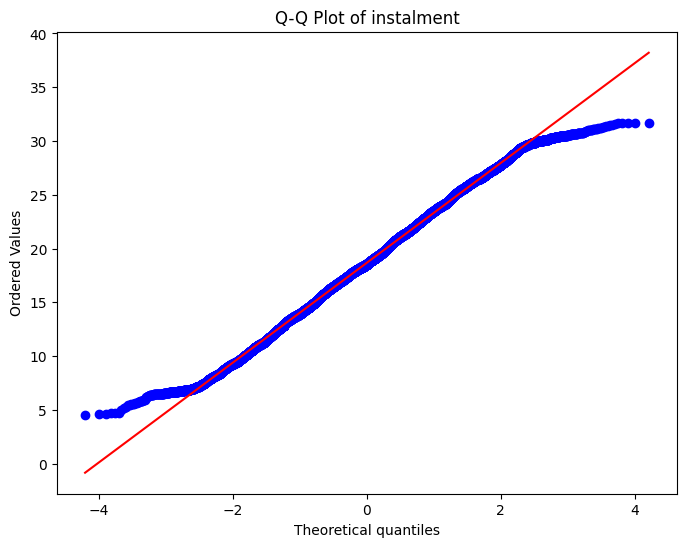

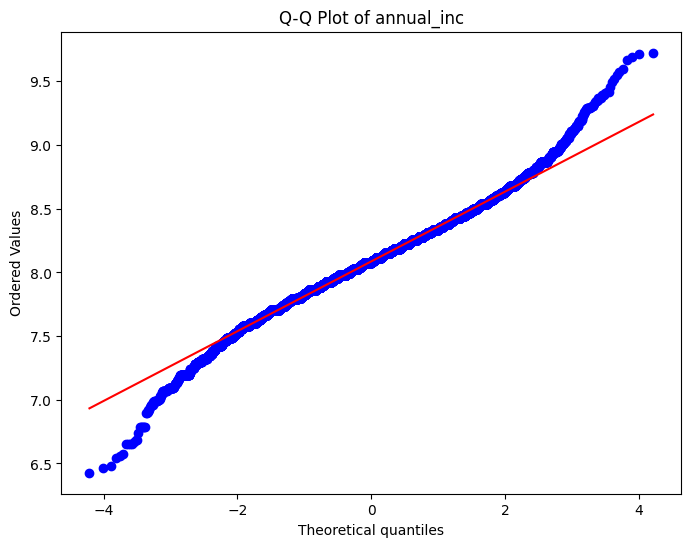

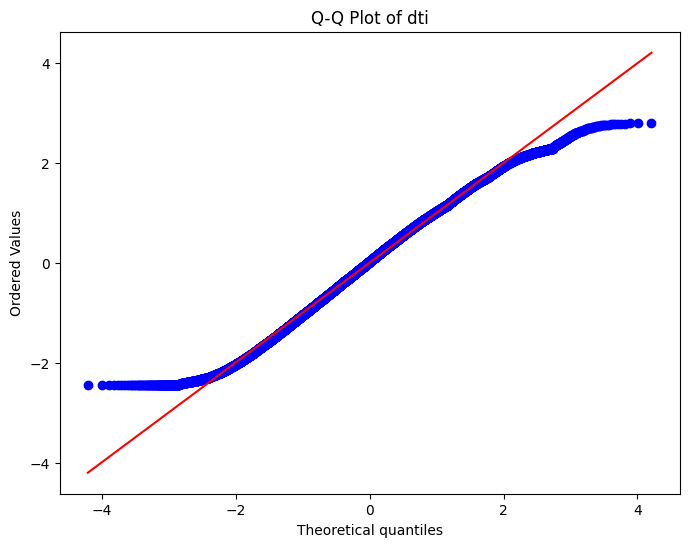

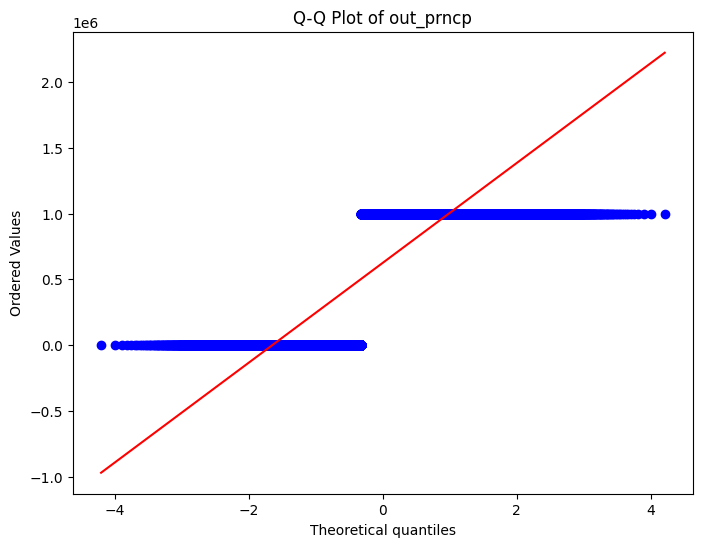

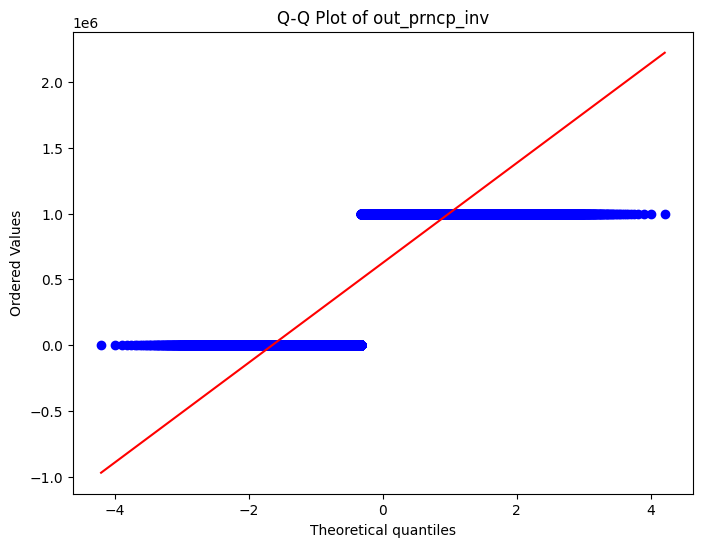

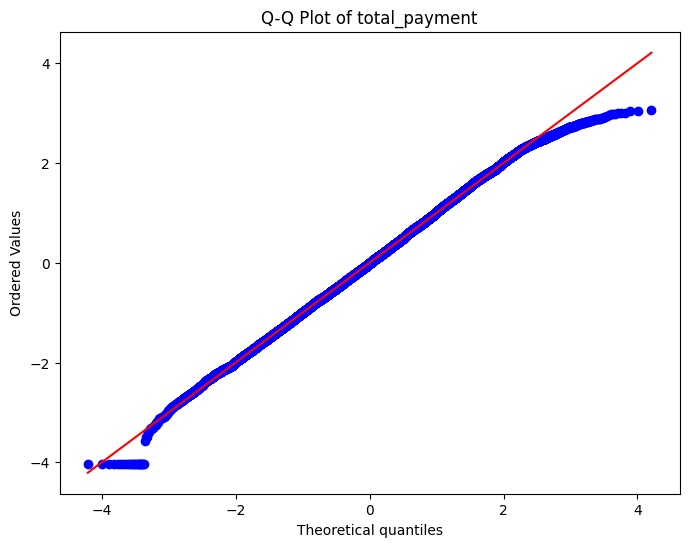

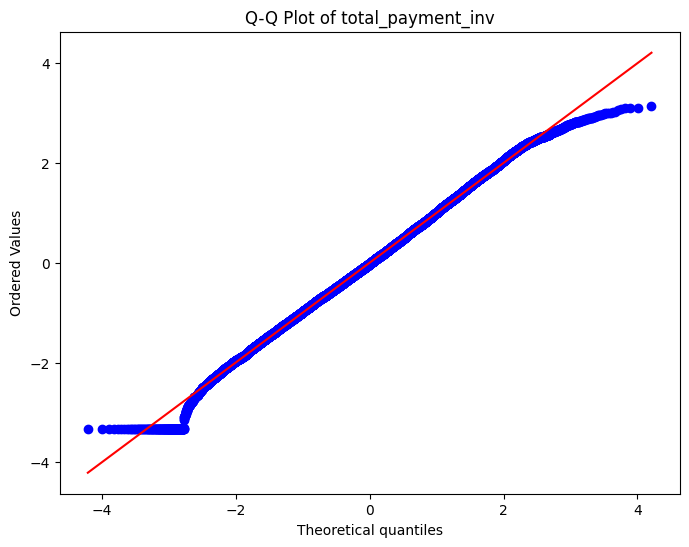

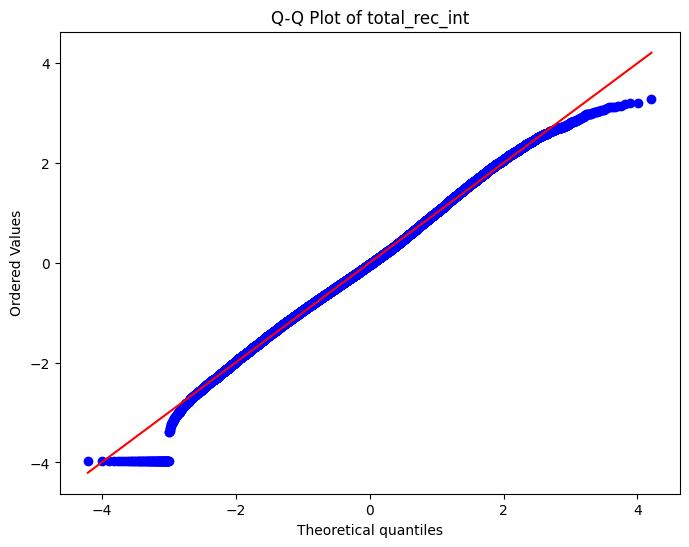

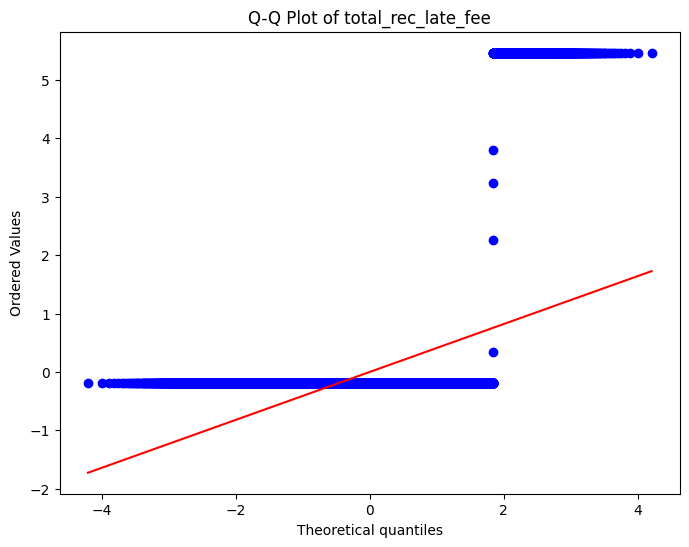

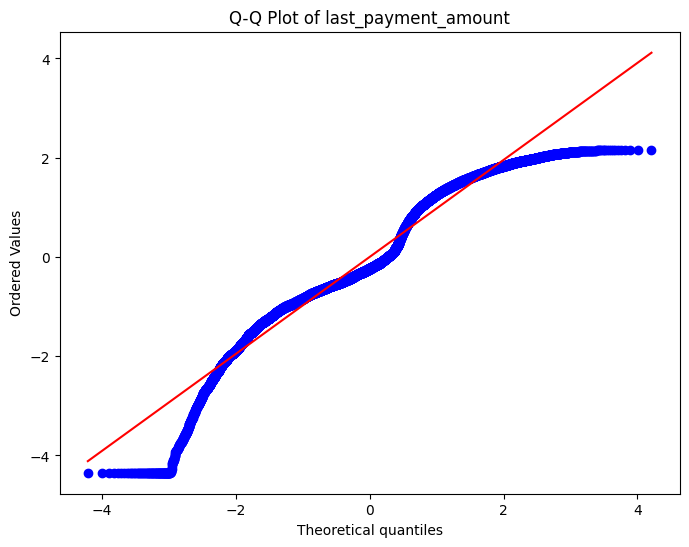

Histograms with KDE after Transformation:


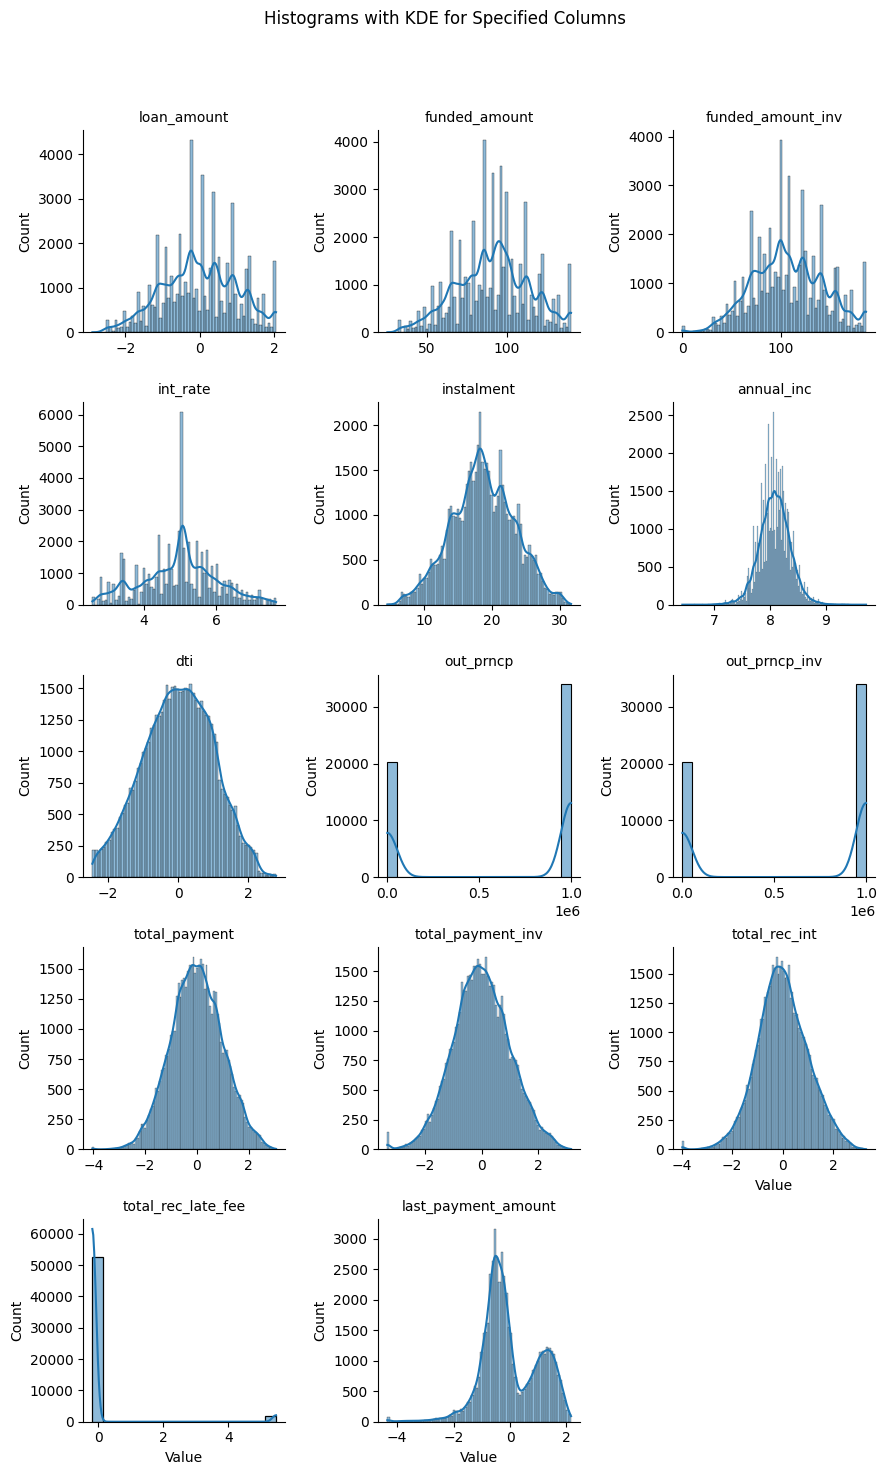

In [7]:
# Instantiate Plotter with the transformed DataFrame
plotter = Plotter(transformed_df)

# Q-Q Plots after Transformation
print("Q-Q Plots after Transformation:")
for col in columns_to_transform:
    plotter.qq_plot(col)

# Histograms with KDE after Transformation using FacetGrid
print("Histograms with KDE after Transformation:")
plotter.plot_histograms_with_kde(columns_to_transform)

In [8]:
# Step 5: Print Skewness After Transformation for All Columns (only for numeric columns)
print("\nSkewness After Transformation (for all numeric columns):\n")
skewness_after = {}
for col in transformer.df.columns:
    if pd.api.types.is_numeric_dtype(transformer.df[col]):
        skewness_value = transformer.df[col].skew()
        skewness_after[col] = skewness_value
        print(f"{col}: {skewness_value:.4f}")
    else:
        print(f"{col}: Skewness not applicable (non-numeric column)")


Skewness After Transformation (for all numeric columns):

id: 2.3703
member_id: 2.2054
loan_amount: -0.0432
funded_amount: -0.0338
funded_amount_inv: 0.0723
term: 1.0538
int_rate: -0.0145
instalment: -0.0208
grade: 0.6950
sub_grade: 0.7002
employment_length: 0.4335
home_ownership: 0.0392
annual_inc: -0.0119
verification_status: -0.1120
issue_date: Skewness not applicable (non-numeric column)
loan_status: -0.1006
payment_plan: Skewness not applicable (non-numeric column)
purpose: 1.9010
dti: -0.0876
delinq_2yrs: 5.3700
earliest_credit_line: Skewness not applicable (non-numeric column)
inq_last_6mths: 3.2489
mths_since_last_delinq: 1.4203
mths_since_last_record: 3.0254
open_accounts: 1.0593
total_accounts: 0.7790
out_prncp: -0.5219
out_prncp_inv: -0.5219
total_payment: -0.0040
total_payment_inv: 0.0050
total_rec_prncp: 1.2610
total_rec_int: 0.0208
total_rec_late_fee: 5.2790
recoveries: 14.5898
collection_recovery_fee: 27.6368
last_payment_date: Skewness not applicable (non-numeric colum

## Analysis of Skewness After Transformation

After applying transformations to reduce skewness, we can analyze the skewness values for all numeric columns in the dataset. The results indicate significant improvements in the skewness for many columns, though some remain skewed. Here are the main observations:

1. **Successful Reduction of Skewness**:<br>Several key columns, such as `loan_amount`, `funded_amount`, `funded_amount_inv`, `int_rate`, and `instalment`, now have skewness values closer to zero (e.g., `loan_amount`: -0.0432, `funded_amount`: -0.0338, `int_rate`: -0.0145). This suggests that the applied transformations effectively made these distributions more symmetric, which is beneficial for improving model performance and ensuring better statistical properties.
<br><br>
2. **Moderate Skewness Remains**:<br> Some columns, such as `term` (1.0538), `open_accounts` (1.0593), and `mths_since_last_delinq` (1.4203), still show moderate skewness. Although transformations have helped to reduce their skewness, these columns may still require additional techniques (e.g., further transformations or binning) if achieving near-normality is critical.
<br><br>
3. **Highly Skewed Columns**:<br> Certain columns remain highly skewed even after transformations. These include `delinq_2yrs` (5.3700), `inq_last_6mths` (3.2489), `recoveries` (14.5898), `collection_recovery_fee` (27.6368), and `collections_12_mths_ex_med` (20.2624). These high levels of skewness suggest that the data contains many zero or extreme values, which may require special handling, such as applying more robust transformations or considering feature engineering techniques that better represent these features.
<br><br>
4. **Categorical Columns**:<br> Columns such as `grade`, `sub_grade`, `employment_length`, `home_ownership`, etc., are non-numeric and thus do not have skewness values calculated. These columns should be encoded appropriately (e.g., using one-hot encoding or ordinal encoding) before they can be used in modeling.
<br><br>
5. **Stable Columns**:<br> Some columns, such as `policy_code` (0.0000), showed no skewness, which indicates a uniform or constant distribution. Such features may require careful consideration as they could be less informative for a predictive model.

### **Conclusion**
The skewness analysis after transformation shows that the applied techniques were generally effective in reducing skewness for many numeric features, making them more suitable for machine learning models. However, certain features remain highly skewed, which indicates a need for additional transformation or domain-specific feature engineering to better address these distributions. The non-numeric features require proper encoding before they can be used effectively in modeling.



In [9]:
# Save a cleaned copy of the DataFrame for further analysis
df.to_csv("b_df_4_tranformed_loan_data.csv", index=False)
print("The transformed DataFrame has been saved as 'b_df_4_transformed_loan_data.csv'")

The transformed DataFrame has been saved as 'b_df_4_transformed_loan_data.csv'
